In [4]:
pwd

'/Users/aidasaglinskas/Desktop/ABCD_ADHD'

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
fn = 'abcd_ksad01.csv'

In [7]:
#df_big = pd.read_csv(fn,low_memory=False)

In [8]:
df = pd.read_csv(fn,low_memory=False)
df.iloc[1::]

df = df.iloc[df['eventname'].values=='baseline_year_1_arm_1']
df.head()
print(df.shape)

(10522, 964)


In [9]:
## Inattention Subtype:  At least 6 of the following are met:
inatt_vec1 = pd.to_numeric(df['ksads_14_394_p'][0::]).isin([1]) # Careless mistakes
inatt_vec2 = pd.to_numeric(df['ksads_14_76_p'][0::]).isin([1]) # Difficulty sustaining attention
inatt_vec3 = pd.to_numeric(df['ksads_14_395_p'][0::]).isin([1]) # Doesnt listen 
inatt_vec4 = pd.to_numeric(df['ksads_14_396_p'][0::]).isin([1]) # Diffulty folllowing instructions

inatt_vec5 = pd.to_numeric(df['ksads_14_397_p'][0::]).isin([1]) # Symptom - Difficulty organizing tasks Present
inatt_vec6 = pd.to_numeric(df['ksads_14_398_p'][0::]).isin([1]) #  Symptom - Avoids tasks requiring attention Present

inatt_vec7 = pd.to_numeric(df['ksads_14_399_p'][0::]).isin([1]) # Often loses things Present
inatt_vec8 = pd.to_numeric(df['ksads_14_80_p'][0::]).isin([1]) # Easily distracted
inatt_vec9 = pd.to_numeric(df['ksads_14_400_p'][0::]).isin([1]) # Forgetful in daily activities

inatt_vec_stacked = np.vstack(
    (inatt_vec1.values,
inatt_vec2.values,
inatt_vec3.values,
inatt_vec4.values,
inatt_vec5.values,
inatt_vec6.values,
inatt_vec7.values,
inatt_vec8.values,
inatt_vec9.values)
)

(inatt_vec_stacked.sum(axis=0)>=6).sum()

904

In [10]:
## Hyperactivity Subtype: At least 6 of the following are met:
hyperact_vec1 = pd.to_numeric(df['ksads_14_401_p'][0::]).isin([1]) # Fidgets
hyperact_vec2 = pd.to_numeric(df['ksads_14_84_p'][0::]).isin([1]) # Symptom - Difficulty remaining seated Present
hyperact_vec3 = pd.to_numeric(df['ksads_14_402_p'][0::]).isin([1]) # Symptom - Runs or climbs excessively Present
hyperact_vec4 = pd.to_numeric(df['ksads_14_403_p'][0::]).isin([1]) # Symptom - Acts like driven by a motor Present

hyperact_vec5 = pd.to_numeric(df['ksads_14_404_p'][0::]).isin([1]) # Symptom - Difficulty playing quietly Present
hyperact_vec6 = pd.to_numeric(df['ksads_14_405_p'][0::]).isin([1]) # Symptom - Blurts out answers Present

hyperact_vec7 = pd.to_numeric(df['ksads_14_406_p'][0::]).isin([1]) # Symptom - Difficulty waiting turn Present
hyperact_vec8 = pd.to_numeric(df['ksads_14_407_p'][0::]).isin([1]) # Symptom - Often Interrupts or intrudes on others Present
hyperact_vec9 = pd.to_numeric(df['ksads_14_408_p'][0::]).isin([1]) # Symptom - Often talks excessively Present

hyperact_vec_stacked = np.vstack(
    (hyperact_vec1.values,
    hyperact_vec2.values,
    hyperact_vec3.values,
    hyperact_vec4.values,
    hyperact_vec5.values,
    hyperact_vec6.values,
    hyperact_vec7.values,
    hyperact_vec8.values,
    hyperact_vec9.values)
)

(hyperact_vec_stacked.sum(axis=0)>=6).sum()

550

In [11]:
before_12_vec1 = pd.to_numeric(df['ksads_14_429_p'][0::]).isin([1]) # Symptom - Several symptoms present prior to age 12 years Present
before_12_vec2 = pd.to_numeric(df['ksads_14_430_p'][0::]).isin([1]) # Symptom - Several symptoms present prior to age 12 years Past
before_12_vec = before_12_vec1.values + before_12_vec2.values

In [12]:
adhd_vec_final = (inatt_vec_stacked.sum(axis=0)>=6) + (hyperact_vec_stacked.sum(axis=0)>=6)
adhd_vec_final = adhd_vec_final * before_12_vec

In [13]:
adhd_vec_final.sum()

1017

In [14]:
# Setting vec, TODO
setting_vec1 = pd.to_numeric(df['ksads_14_425_p'][0::]).isin([1]) # Symptom - Symptoms interfere with social academic or occupational functioning Past

In [15]:
adhd_vec_final.shape

(10522,)

In [17]:
ADHD_names = list(df['subjectkey'].values[adhd_vec_final])

In [18]:
### ## NO Innatention

td_inatt_vec1_present = pd.to_numeric(df['ksads_14_394_p'][0::]).isin([0]) # Careless mistakes | Present
td_inatt_vec2_present = pd.to_numeric(df['ksads_14_76_p'][0::]).isin([0]) # Difficulty sustaining attention | Present
td_inatt_vec3_present = pd.to_numeric(df['ksads_14_395_p'][0::]).isin([0]) # Doesnt listen | Present
td_inatt_vec4_present = pd.to_numeric(df['ksads_14_396_p'][0::]).isin([0]) # Diffulty folllowing instructions| Present
td_inatt_vec5_present = pd.to_numeric(df['ksads_14_397_p'][0::]).isin([0]) # Symptom - Difficulty organizing tasks Present | Present
td_inatt_vec6_present = pd.to_numeric(df['ksads_14_398_p'][0::]).isin([0]) #  Symptom - Avoids tasks requiring attention | Present
td_inatt_vec7_present = pd.to_numeric(df['ksads_14_399_p'][0::]).isin([0]) # Often loses things | Present
td_inatt_vec8_present = pd.to_numeric(df['ksads_14_80_p'][0::]).isin([0]) # Easily distracted | Present
td_inatt_vec9_present = pd.to_numeric(df['ksads_14_400_p'][0::]).isin([0]) # Forgetful in daily activities| Present

td_inatt_vec1_past = pd.to_numeric(df['ksads_14_410_p'][0::]).isin([0]) # Careless mistakes | Past
td_inatt_vec2_past = pd.to_numeric(df['ksads_14_78_p'][0::]).isin([0]) # Difficulty sustaining attention | Past
td_inatt_vec3_past = pd.to_numeric(df['ksads_14_411_p'][0::]).isin([0]) # Doesnt listen | Past
td_inatt_vec4_past = pd.to_numeric(df['ksads_14_412_p'][0::]).isin([0]) # Diffulty folllowing instructions| Past
td_inatt_vec5_past = pd.to_numeric(df['ksads_14_413_p'][0::]).isin([0]) # Symptom - Difficulty organizing tasks Present | Past
td_inatt_vec6_past = pd.to_numeric(df['ksads_14_414_p'][0::]).isin([0]) #  Symptom - Avoids tasks requiring attention | Past
td_inatt_vec7_past = pd.to_numeric(df['ksads_14_415_p'][0::]).isin([0]) # Often loses things | Past
td_inatt_vec8_past = pd.to_numeric(df['ksads_14_82_p'][0::]).isin([0]) # Easily distracted | Past
td_inatt_vec9_past = pd.to_numeric(df['ksads_14_416_p'][0::]).isin([0]) # Forgetful in daily activities| Past

temp1 = np.vstack((td_inatt_vec1_present.values,
td_inatt_vec2_present.values,
td_inatt_vec3_present.values,
td_inatt_vec4_present.values,
td_inatt_vec5_present.values,
td_inatt_vec6_present.values,
td_inatt_vec7_present.values,
td_inatt_vec8_present.values,
td_inatt_vec9_present.values))


temp2 = np.vstack((td_inatt_vec1_past.values,
td_inatt_vec2_past.values,
td_inatt_vec3_past.values,
td_inatt_vec4_past.values,
td_inatt_vec5_past.values,
td_inatt_vec6_past.values,
td_inatt_vec7_past.values,
td_inatt_vec8_past.values,
td_inatt_vec9_past.values))

td_no_innat = ((temp1.sum(axis=0)==9) * (temp2.sum(axis=0)==9))
#td_no_innat = ((temp1.sum(axis=0)>=1) * (temp2.sum(axis=0)>=1))
td_no_innat.sum()

4067

In [19]:
temp1.sum(axis=1)

array([6423, 9307, 6141, 6155, 6188, 6168, 6399, 9376, 6176])

In [20]:
temp2.sum(axis=1)

array([5648, 8390, 5050, 5134, 5146, 5168, 5408, 8205, 5103])

In [21]:
## NO Hyperactivity
td_hyperact_vec1_present = pd.to_numeric(df['ksads_14_401_p'][0::]).isin([0]) # Fidgets Present
td_hyperact_vec2_present = pd.to_numeric(df['ksads_14_84_p'][0::]).isin([0]) # Symptom - Difficulty remaining seated Present
td_hyperact_vec3_present = pd.to_numeric(df['ksads_14_402_p'][0::]).isin([0]) # Symptom - Runs or climbs excessively Present
td_hyperact_vec4_present = pd.to_numeric(df['ksads_14_403_p'][0::]).isin([0]) # Symptom - Acts like driven by a motor Present

td_hyperact_vec5_present = pd.to_numeric(df['ksads_14_404_p'][0::]).isin([0]) # Symptom - Difficulty playing quietly Present
td_hyperact_vec6_present = pd.to_numeric(df['ksads_14_405_p'][0::]).isin([0]) # Symptom - Blurts out answers Present

td_hyperact_vec7_present = pd.to_numeric(df['ksads_14_406_p'][0::]).isin([0]) # Symptom - Difficulty waiting turn Present
td_hyperact_vec8_present = pd.to_numeric(df['ksads_14_407_p'][0::]).isin([0]) # Symptom - Often Interrupts or intrudes on others Present
td_hyperact_vec9_present = pd.to_numeric(df['ksads_14_408_p'][0::]).isin([0]) # Symptom - Often talks excessively Present


td_hyperact_vec1_past = pd.to_numeric(df['ksads_14_417_p'][0::]).isin([0]) # Fidgets Past
td_hyperact_vec2_past = pd.to_numeric(df['ksads_14_86_p'][0::]).isin([0]) # Symptom - Difficulty remaining seated Past
td_hyperact_vec3_past = pd.to_numeric(df['ksads_14_418_p'][0::]).isin([0]) # Symptom - Runs or climbs excessively Past
td_hyperact_vec4_past = pd.to_numeric(df['ksads_14_419_p'][0::]).isin([0]) # Symptom - Acts like driven by a motor Past

td_hyperact_vec5_past = pd.to_numeric(df['ksads_14_420_p'][0::]).isin([0]) # Symptom - Difficulty playing quietly Past
td_hyperact_vec6_past = pd.to_numeric(df['ksads_14_421_p'][0::]).isin([0]) # Symptom - Blurts out answers Past

td_hyperact_vec7_past = pd.to_numeric(df['ksads_14_422_p'][0::]).isin([0]) # Symptom - Difficulty waiting turn Past
td_hyperact_vec8_past = pd.to_numeric(df['ksads_14_423_p'][0::]).isin([0]) # Symptom - Often Interrupts or intrudes on others Past
td_hyperact_vec9_past = pd.to_numeric(df['ksads_14_424_p'][0::]).isin([0]) # Symptom - Often talks excessively Past


temp1 = np.vstack((td_hyperact_vec1_present,
td_hyperact_vec2_present,
td_hyperact_vec3_present,
td_hyperact_vec4_present,
td_hyperact_vec5_present,
td_hyperact_vec6_present,
td_hyperact_vec7_present,
td_hyperact_vec8_present,
td_hyperact_vec9_present))


temp2 = np.vstack((td_hyperact_vec1_past,
td_hyperact_vec2_past,
td_hyperact_vec3_past,
td_hyperact_vec4_past,
td_hyperact_vec5_past,
td_hyperact_vec6_past,
td_hyperact_vec7_past,
td_hyperact_vec8_past,
td_hyperact_vec9_past))

td_no_hyperact = ((temp1.sum(axis=0)==9) * (temp2.sum(axis=0)==9)) # No in at least one category 
td_no_hyperact.sum()

4373

In [22]:
td_vec_final = (td_no_innat * td_no_hyperact)

In [23]:
TD_names = list(pd.unique(df['subjectkey'].values[td_vec_final]))

In [24]:
ages_adhd = pd.to_numeric(df['interview_age'][df['subjectkey'].isin(ADHD_names)].values)
ages_td = pd.to_numeric(df['interview_age'][df['subjectkey'].isin(TD_names)].values)

In [25]:
sex_adhd = df['sex'][df['subjectkey'].isin(ADHD_names)].values=='M'
sex_td = df['sex'][df['subjectkey'].isin(TD_names)].values=='M'

In [26]:
sex_adhd.mean()

0.6873156342182891

In [27]:
sex_td.mean()

0.47351405123103707

(array([466., 444., 263., 465., 280., 507., 478., 324., 483., 311.]),
 array([ 8.91666667,  9.13333333,  9.35      ,  9.56666667,  9.78333333,
        10.        , 10.21666667, 10.43333333, 10.65      , 10.86666667,
        11.08333333]),
 <BarContainer object of 10 artists>)

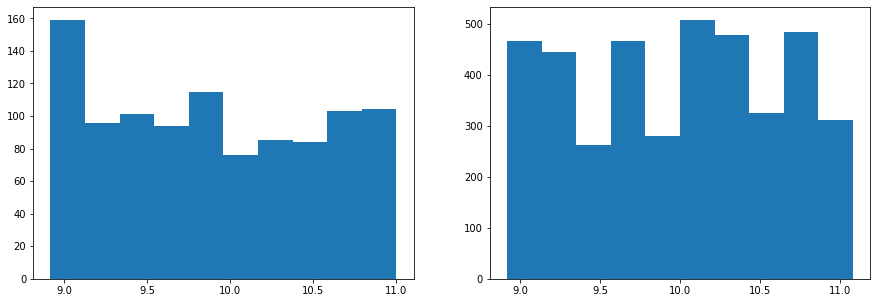

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(ages_adhd/12)
plt.subplot(1,2,2)
plt.hist(ages_td/12)

In [34]:
pd.DataFrame(ADHD_names,columns=['subjectkey']).to_csv(f'ABCD_ADHD_subjectIDs_N_{len(ADHD_names)}.csv')

In [ ]:
pd.DataFrame(TD_names,columns=['subjectkey']).to_csv(f'ABCD_NON_ADHD_subjectIDs_N_{len(TD_names)}.csv')